In [1]:
import pandas as pd
# Read the entire file into a DataFrame
df = pd.read_csv("vdjdb.txt", delimiter='\t')  # Assuming the file is tab-delimited, adjust if needed

# Display the DataFrame
df.columns.values

array(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'reference.id', 'method', 'meta', 'cdr3fix',
       'vdjdb.score', 'web.method', 'web.method.seq', 'web.cdr3fix.nc',
       'web.cdr3fix.unmp'], dtype=object)

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species','vdjdb.score', 'meta']]

In [178]:
# pd.set_option('display.max_colwidth', None)
# df[['meta']].head(3)

In [179]:
# pd.reset_option('display.max_colwidth')

# filtered_df = df[df['complex.id'] == 4]
# filtered_df.head(5)

In [4]:
df.info()
# df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       92771 non-null  int64 
 1   gene             92771 non-null  object
 2   cdr3             92771 non-null  object
 3   v.segm           92670 non-null  object
 4   j.segm           91626 non-null  object
 5   species          92771 non-null  object
 6   mhc.a            92771 non-null  object
 7   mhc.b            92771 non-null  object
 8   mhc.class        92771 non-null  object
 9   antigen.epitope  92771 non-null  object
 10  antigen.gene     92709 non-null  object
 11  antigen.species  92771 non-null  object
 12  vdjdb.score      92771 non-null  int64 
 13  meta             92771 non-null  object
dtypes: int64(2), object(12)
memory usage: 9.9+ MB


In [5]:
# Number of duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicated rows:",\
      duplicate_rows_df.shape)

Number of duplicated rows: (280, 14)


### Dropping duplicate rows - not dropping since tcrdist3 take care of duplicated values

In [9]:
# # Drop duplicate rows
# df=df.drop_duplicates()
# df.shape

### Dropping null value

In [6]:
print(df.isnull().sum())

complex.id            0
gene                  0
cdr3                  0
v.segm              101
j.segm             1145
species               0
mhc.a                 0
mhc.b                 0
mhc.class             0
antigen.epitope       0
antigen.gene         62
antigen.species       0
vdjdb.score           0
meta                  0
dtype: int64


In [7]:
df=df.dropna()
df.shape

(91550, 14)

**After dropping null value**


In [8]:
print(df.isnull().sum())

complex.id         0
gene               0
cdr3               0
v.segm             0
j.segm             0
species            0
mhc.a              0
mhc.b              0
mhc.class          0
antigen.epitope    0
antigen.gene       0
antigen.species    0
vdjdb.score        0
meta               0
dtype: int64


>**## Exploring the data ##**

In [13]:
# Specify the substring to search for
# pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')
substring = 'CD8+'

# Use boolean indexing to filter rows containing the substring in 'Description'

filtered_df = df[df['meta'].str.contains(substring, case=False, na=False)]

filtered_df[filtered_df['mhc.class']=='MHCII'].head(2)



,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score,meta
5309,0,TRB,CASSKLASTAGEQYF,TRBV2*01,TRBJ2-7*01,HomoSapiens,HLA-DRA*01:01,HLA-DRB1*11:01,MHCII,DRFYKTLRAEQASQEV,Gag,HIV-1,1,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."
5310,0,TRB,CASSGGQETQYF,TRBV14*01,TRBJ2-5*01,HomoSapiens,HLA-DRA*01:01,HLA-DRB1*01:01,MHCII,LNKIVRMYSPTSILD,Gag,HIV-1,1,"{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor..."


##  TCRDist3

In [14]:
df_dash = pd.read_csv("https://raw.githubusercontent.com/kmayerb/tcrdist2/API2/tcrdist/test_files_compact/dash.csv")

## Installing tcrdist3 package ##

In [16]:
# pip install tcrdist3
# installing tcrdist3

In [17]:
# from tcrdist.repertoire import TCRrep
# tr = TCRrep(cell_df = df_dash, 
#             organism = 'mouse', 
#             chains = ['alpha','beta'], 
#             db_file = 'alphabeta_gammadelta_db.tsv')

# tr.pw_alpha
# # tr.pw_beta
# # tr.pw_cdr3_a_aa
# # tr.pw_cdr3_b_aa

In [18]:
# tr = TCRrep(cell_df = df_dash,
#             organism = 'mouse',
#             chains = ['alpha','beta'],
#             db_file = 'alphabeta_gammadelta_db.tsv',
#             compute_distances = False)

# tr.cpus = 2
# tr.compute_sparse_rect_distances(radius = 50, chunk_size = 100)
# tr.rw_beta
# # """<1920x1920 sparse matrix of type '<class 'numpy.int16'>'
# # with 108846 stored elements in Compressed Sparse Row format>
# # """
# # print(tr.rw_beta)    

In [19]:
# print(tr.rw_beta)    

## Preprocess vdjdb.text dataset for tcrdist3

In [9]:
df.columns.values

array(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'vdjdb.score', 'meta'], dtype=object)

In [10]:
df = df[['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'antigen.epitope', 'antigen.gene', 'antigen.species', 'vdjdb.score']]

In [11]:
filter=df['vdjdb.score']==0
df=df[~filter]
df.head(3)

,complex.id,gene,cdr3,v.segm,j.segm,species,antigen.epitope,antigen.gene,antigen.species,vdjdb.score
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2


# Separating data set in to alpha and beta dataframe

# Alpha data frame

In [191]:
import pandas as pd

# Assuming df is your original dataframe
# Create separate dataframes for alpha and beta chains
df_alpha = df[df['gene'] == 'TRA'].rename(columns={'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene'})
df_beta = df[df['gene'] == 'TRB'].rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})

In [192]:
print("alpha chain:", df_alpha.shape)
print("beta chain:", df_beta.shape)

alpha chain: (3676, 10)
beta chain: (8418, 10)


In [113]:
df_alpha.reset_index(drop=True, inplace=True)

## Remove complex_id 0

In [193]:
#remove complex_id 0
filter=df_alpha['complex.id']==0
df_alpha=df_alpha[~filter]

df_alpha.shape

(2812, 10)

In [194]:
filter=df_beta['complex.id']==0
df_beta=df_beta[~filter]

df_beta.shape

(2860, 10)

Size of two chain are approximately the same now

In [116]:
df_alpha = df_alpha[~df_alpha['species'].isin(['MusMusculus', 'MacacaMulatta'])]

In [ ]:
df_alpha['species'].unique()

In [117]:
df_alpha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 0 to 3675
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       1913 non-null   int64 
 1   gene             1913 non-null   object
 2   cdr3_a_aa        1913 non-null   object
 3   v_a_gene         1913 non-null   object
 4   j_a_gene         1913 non-null   object
 5   species          1913 non-null   object
 6   antigen.epitope  1913 non-null   object
 7   antigen.gene     1913 non-null   object
 8   antigen.species  1913 non-null   object
 9   vdjdb.score      1913 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 164.4+ KB


## Run TCRDist on human alpha gene dataset

In [118]:
from tcrdist.repertoire import TCRrep
tr = TCRrep(cell_df = df_alpha, 
            organism = 'human', 
            chains = ['alpha'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

In [119]:
#tcrdist3 create a clone df that matches with the resulting distance matrix, 
#use this to concatnate the distance matrix with the corresponding epitope
tr.clone_df.shape
tr.clone_df.head(5)
clone_df=tr.clone_df

In [120]:
alpha_chain = tr.pw_alpha
alpha_chain.shape

(1913, 1913)

We need to scale the matrix before loading into tcrdist

In [32]:
# # Scaling the matrix

# from sklearn.preprocessing import StandardScaler
# std_scaler = StandardScaler()
# alpha_scaled_df = std_scaler.fit_transform(alpha_chain)
# alpha_scaled_df

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca_alpha_homo = pca.fit_transform(alpha_chain)
pca_alpha_homo.shape

(1913, 50)

In [292]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_alpha_homo = pca.fit_transform(alpha_chain)
pca_alpha_homo.shape

(1913, 2)

In [293]:
alpha_chain

array([[  0, 138, 110, ..., 159, 194, 149],
       [138,   0, 131, ..., 141, 152, 132],
       [110, 131,   0, ..., 166, 173, 129],
       ...,
       [159, 141, 166, ...,   0, 141, 133],
       [194, 152, 173, ..., 141,   0, 158],
       [149, 132, 129, ..., 133, 158,   0]], dtype=int16)

## Implementing TSNE

In [91]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=100)
X_tsne = tsne.fit_transform(pca_alpha_homo)
tsne.kl_divergence_

0.6264517307281494

In [92]:
alpha_homo_dist_df = pd.DataFrame(X_tsne, columns =['A', 'B'])
alpha_homo_dist_df.head(5)

,A,B
0,-9.136164,13.247592
1,-2.372453,12.155268
2,24.258825,-16.514833
3,-9.136164,13.247592
4,-2.372472,12.155076


In [93]:
# combining the columns of the two dataframes
df_concat_a = pd.concat([alpha_homo_dist_df.reset_index(drop=True),clone_df.reset_index(drop=True)], axis=1)

In [95]:
# Create a dataframe for plotting
plot_a_df_homo = df_concat_a[['antigen.species', 'A', 'B']]

In [128]:
plot_a_df_homo.head(5)

,antigen.species,A,B
0,HIV-1,-9.136164,13.247592
1,HIV-1,-2.372453,12.155268
2,HIV-1,24.258825,-16.514833
3,HIV-1,-9.136164,13.247592
4,HIV-1,-2.372472,12.155076


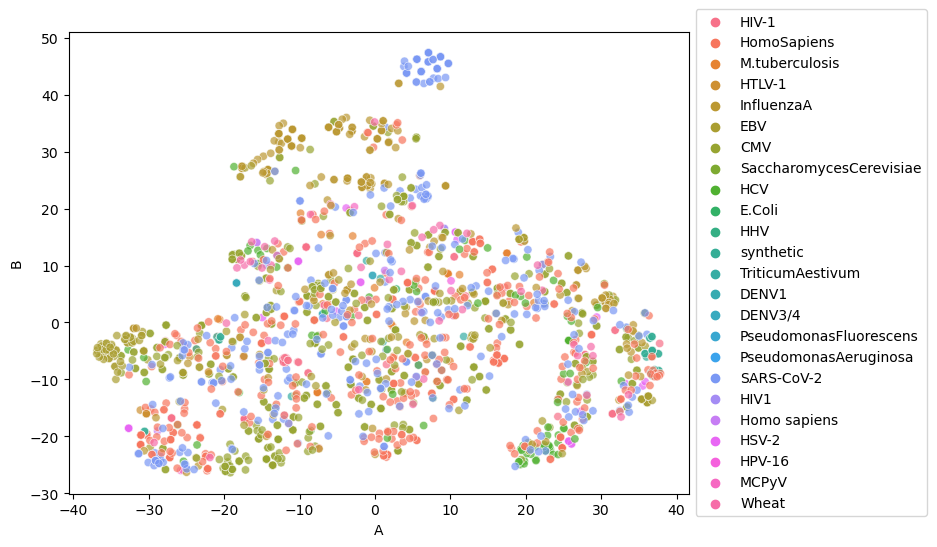

In [97]:
# Plotting using seaborn
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_a_df_homo, x='A', y='B', hue='antigen.species', alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [98]:
fig_2d = px.scatter(
    X_tsne, x=0, y=1,
    color=plot_a_df_homo['antigen.species'], labels={'color': 'species'}
)
fig_2d.show()

## Implementing UMAP

In [258]:
# pip install umap-learn

In [63]:
from umap import UMAP
import plotly.express as px


In [61]:
pca_alpha_homo.shape

(1913, 50)

In [104]:
umap_2d = UMAP(n_neighbors = 150, n_components=2, random_state=0, metric='euclidean', min_dist=0.9)
proj_2d = umap_2d.fit_transform(pca_alpha_homo)

alpha_dist_df = pd.DataFrame(proj_2d, columns =['A', 'B'])

df_concat_a = pd.concat([alpha_dist_df.reset_index(drop=True),clone_df.reset_index(drop=True)], axis=1)

plot_a_df_umap = df_concat_a[['antigen.species', 'A', 'B']]

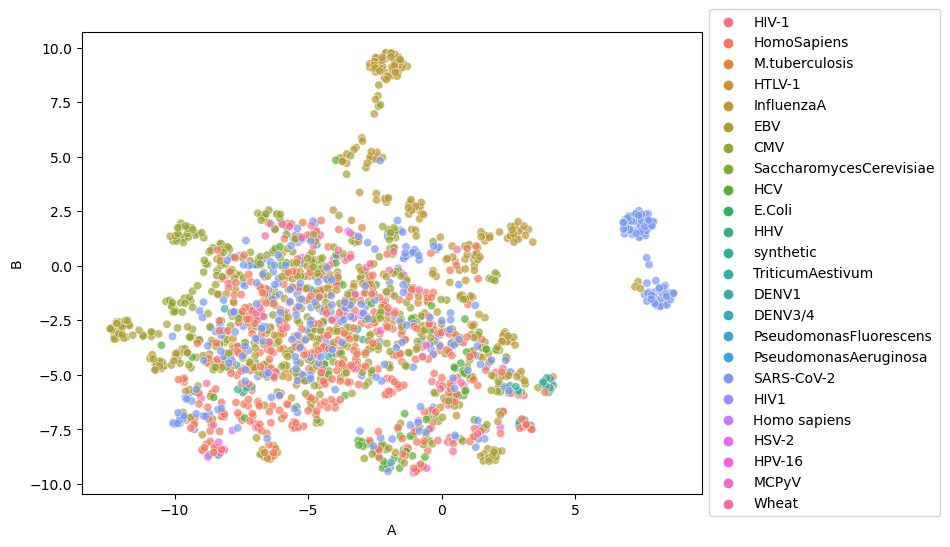

In [105]:
# Plotting using seaborn
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_a_df_umap, x='A', y='B', hue='antigen.species', alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [89]:
umap_3d = UMAP(n_neighbors = 150, n_components=3, random_state=0, metric='euclidean', min_dist=0.99)
proj_3d = umap_3d.fit_transform(pca_alpha_homo)

proj_3d

array([[13.650598 , 13.655475 ,  2.2316313],
       [13.3612385, 15.843961 ,  1.030227 ],
       [13.748362 , 19.409554 ,  3.0862591],
       ...,
       [11.58869  , 14.444687 ,  4.096808 ],
       [10.676113 , 17.163717 ,  3.0152214],
       [12.937195 , 16.629364 , -3.658006 ]], dtype=float32)

In [99]:
import plotly.express as px

fig = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df_concat_a['antigen.species'], labels={'color': 'species'}
)
fig.update_traces(marker_size=3)
fig.show()

# Beta data frame - human

In [166]:
df_beta.head(5)

,complex.id,gene,cdr3_b_aa,v_b_gene,j_b_gene,species,antigen.epitope,antigen.gene,antigen.species,vdjdb.score
0,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
1,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
2,3,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
3,4,TRB,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2
4,5,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,FLKEQGGL,Nef,HIV-1,2


In [167]:
df_beta = df_beta[~df_beta['species'].isin(['MusMusculus', 'MacacaMulatta'])]

In [168]:
df_beta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 2859
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       1938 non-null   int64 
 1   gene             1938 non-null   object
 2   cdr3_b_aa        1938 non-null   object
 3   v_b_gene         1938 non-null   object
 4   j_b_gene         1938 non-null   object
 5   species          1938 non-null   object
 6   antigen.epitope  1938 non-null   object
 7   antigen.gene     1938 non-null   object
 8   antigen.species  1938 non-null   object
 9   vdjdb.score      1938 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 166.5+ KB


In [169]:
from tcrdist.repertoire import TCRrep
tr = TCRrep(cell_df = df_beta, 
            organism = 'human', 
            chains = ['beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

tr.clone_df.shape
tr.clone_df.head(5)
clone_df_b =tr.clone_df

In [170]:
beta_chain_human = tr.pw_beta

In [173]:
X_tsne.shape

(1938, 2)

In [ ]:
# Implement PCA
pca = PCA(n_components=50)
pca_beta_homo = pca.fit_transform(beta_chain_human)


#Implement TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=50)
X_tsne = tsne.fit_transform(pca_beta_homo)


beta_homo_dist_df = pd.DataFrame(X_tsne, columns =['A', 'B'])
beta_homo_dist_df.head(5)



# Combining the columns of the two dataframes
df_concat_b = pd.concat([beta_homo_dist_df.reset_index(drop=True),clone_df_b.reset_index(drop=True)], axis=1)

plot_b_df_homo = df_concat_b[['antigen.species', 'A', 'B']]

#PLotting beta chain
fig_2d = px.scatter(
    X_tsne, x=0, y=1,
    color=plot_b_df_homo['antigen.species'], labels={'color': 'species'}
)
fig_2d.show()



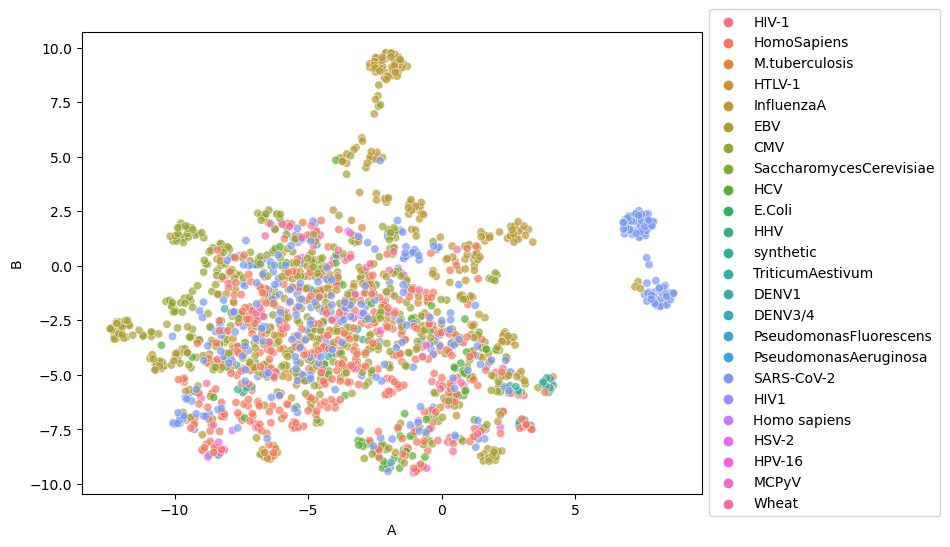

In [155]:
umap_2d = UMAP(n_neighbors = 150, n_components=2, random_state=0, metric='euclidean', min_dist=0.9)
proj_2d = umap_2d.fit_transform(pca_beta_homo)

beta_dist_df = pd.DataFrame(proj_2d, columns =['A', 'B'])

df_concat_b = pd.concat([beta_dist_df.reset_index(drop=True),clone_df_b.reset_index(drop=True)], axis=1)

plot_b_df_umap = df_concat_a[['antigen.species', 'A', 'B']]



# Plotting using seaborn
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_a_df_umap, x='A', y='B', hue='antigen.species', alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## Create data frame with alpha and beta chain

In [142]:
df_alpha = df[df['gene'] == 'TRA'].rename(columns={'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene'})
df_beta = df[df['gene'] == 'TRB'].rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})

In [143]:
df_alpha = df_alpha[df_alpha['complex.id'] != 0].reset_index(drop=True)
df_beta = df_beta[df_beta['complex.id'] != 0].reset_index(drop=True)

In [144]:
df_merge = pd.merge(df_alpha, df_beta, on='complex.id')
df_merge.shape

(2739, 19)

In [145]:
df_merge.drop(['species_y'], axis=1, inplace=True)

In [146]:
df_merge.species_x.value_counts()

HomoSapiens    1840
MusMusculus     899
Name: species_x, dtype: int64

In [147]:
filter=df_merge['species_x']=='MusMusculus'
df_merge[~filter].reset_index(drop=True, inplace=True)
df_merge.head()

,complex.id,gene_x,cdr3_a_aa,v_a_gene,j_a_gene,species_x,antigen.epitope_x,antigen.gene_x,antigen.species_x,vdjdb.score_x,gene_y,cdr3_b_aa,v_b_gene,j_b_gene,antigen.epitope_y,antigen.gene_y,antigen.species_y,vdjdb.score_y
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL,Nef,HIV-1,2
1,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEKGGL,Nef,HIV-1,2
2,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,FLKEKGGL,Nef,HIV-1,2,TRB,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,FLKEKGGL,Nef,HIV-1,2
3,5,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,FLKEQGGL,Nef,HIV-1,2,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEQGGL,Nef,HIV-1,2
4,6,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,FLKEQGGL,Nef,HIV-1,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,FLKEQGGL,Nef,HIV-1,2


In [148]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2739 entries, 0 to 2738
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   complex.id         2739 non-null   int64 
 1   gene_x             2739 non-null   object
 2   cdr3_a_aa          2739 non-null   object
 3   v_a_gene           2739 non-null   object
 4   j_a_gene           2739 non-null   object
 5   species_x          2739 non-null   object
 6   antigen.epitope_x  2739 non-null   object
 7   antigen.gene_x     2739 non-null   object
 8   antigen.species_x  2739 non-null   object
 9   vdjdb.score_x      2739 non-null   int64 
 10  gene_y             2739 non-null   object
 11  cdr3_b_aa          2739 non-null   object
 12  v_b_gene           2739 non-null   object
 13  j_b_gene           2739 non-null   object
 14  antigen.epitope_y  2739 non-null   object
 15  antigen.gene_y     2739 non-null   object
 16  antigen.species_y  2739 non-null   object


### Combined alpha and beta distance

In [174]:
from tcrdist.repertoire import TCRrep
tr = TCRrep(cell_df = df_merge, 
            organism = 'human', 
            chains = ['alpha','beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            deduplicate = True,
            compute_distances = True)

tr.clone_df.shape
tr.clone_df.head(5)
clone_df_comb =tr.clone_df

In [175]:
print("alpha shape:", tr.pw_alpha.shape)
print("beta shape", tr.pw_beta.shape)
print("clone shape", clone_df_comb.shape)



alpha shape: (1877, 1877)
beta shape (1877, 1877)
clone shape (1877, 26)


In [151]:
print("alpha shape:", tr.pw_cdr3_b_aa.shape)
print("beta shape", tr.pw_cdr3_b_aa.shape)

alpha shape: (1877, 1877)
beta shape (1877, 1877)


In [176]:
combined_pw_distance_homo = tr.pw_cdr3_a_aa + tr.pw_cdr3_b_aa
combined_pw_distance_homo.shape

(1877, 1877)

In [183]:
# Implement PCA
pca = PCA(n_components=50)
pca_combine_homo = pca.fit_transform(combined_pw_distance_homo)


#Implement TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=500)
X_tsne = tsne.fit_transform(pca_combine_homo)


combine_homo_dist_df = pd.DataFrame(X_tsne, columns =['A', 'B'])
combine_homo_dist_df.head(5)


# Combining the columns of the two dataframes
df_concat_combine = pd.concat([combine_homo_dist_df.reset_index(drop=True),clone_df_comb.reset_index(drop=True)], axis=1)

plot_combine_df_homo = df_concat_combine[['antigen.species_x', 'A', 'B']]

#PLotting alpha beta chain
fig_2d = px.scatter(
    X_tsne, x=0, y=1,
    color=plot_combine_df_homo['antigen.species_x'], labels={'color': 'species'}
)
fig_2d.show()


## Separating alpha and beta mouse

In [195]:
import pandas as pd

# Assuming df is your original dataframe
# Create separate dataframes for alpha and beta chains
df_alpha = df[df['gene'] == 'TRA'].rename(columns={'cdr3': 'cdr3_a_aa', 'v.segm': 'v_a_gene', 'j.segm': 'j_a_gene'})
df_beta = df[df['gene'] == 'TRB'].rename(columns={'cdr3': 'cdr3_b_aa', 'v.segm': 'v_b_gene', 'j.segm': 'j_b_gene'})


#remove complex_id 0
filter=df_alpha['complex.id']==0
df_alpha=df_alpha[~filter]


filter=df_beta['complex.id']==0
df_beta=df_beta[~filter]

#filter mouse
df_alpha_mouse = df_alpha[df_alpha['species'].isin(['MusMusculus'])]
df_beta_mouse = df_beta[df_beta['species'].isin(['MusMusculus'])]



## Mouse alpha Chain

In [199]:
from tcrdist.repertoire import TCRrep
tr = TCRrep(cell_df = df_alpha_mouse, 
            organism = 'mouse', 
            chains = ['alpha'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

tr.clone_df.shape
tr.clone_df.head(5)
clone_df_mouse_a = tr.clone_df

alpha_chain_mouse = tr.pw_alpha


#PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca_alpha_mouse = pca.fit_transform(alpha_chain_mouse)
pca_alpha_mouse.shape

(899, 50)

In [203]:
#Implement TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=100)
X_tsne = tsne.fit_transform(pca_alpha_mouse)


alpha_mouse_dist_df = pd.DataFrame(X_tsne, columns =['A', 'B'])


# Combining the columns of the two dataframes
df_concat_a_mouse = pd.concat([alpha_mouse_dist_df.reset_index(drop=True),clone_df_mouse_a.reset_index(drop=True)], axis=1)

plot_a_df_mouse = df_concat_a_mouse[['antigen.species', 'A', 'B']]

#PLotting beta chain
fig_2d = px.scatter(
    X_tsne, x=0, y=1,
    color=plot_a_df_mouse['antigen.species'], labels={'color': 'species'}
)
fig_2d.show()



In [208]:
umap_2d = UMAP(n_neighbors = 150, n_components=2, random_state=0, metric='euclidean', min_dist=0.9)
proj_2d = umap_2d.fit_transform(pca_alpha_mouse)

alpha_mouse_dist_df_dist_df = pd.DataFrame(proj_2d, columns =['A', 'B'])

df_concat_a_mouse = pd.concat([alpha_mouse_dist_df_dist_df.reset_index(drop=True),clone_df_mouse_a.reset_index(drop=True)], axis=1)

plot_a_df_umap_mouse = df_concat_a_mouse[['antigen.species', 'A', 'B']]

#PLotting alpha chain umap
fig_2d = px.scatter(
    plot_a_df_umap_mouse, x='A', y='B',
    color=plot_a_df_umap_mouse['antigen.species'], labels={'color': 'species'}
)
fig_2d.show()


## Mouse Beta Chain

In [210]:
from tcrdist.repertoire import TCRrep
tr = TCRrep(cell_df = df_beta_mouse, 
            organism = 'mouse', 
            chains = ['beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

tr.clone_df.shape
tr.clone_df.head(5)
clone_df_mouse_b = tr.clone_df

beta_chain_mouse = tr.pw_beta


#PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca_beta_mouse = pca.fit_transform(beta_chain_mouse)
pca_beta_mouse.shape

(922, 50)

In [225]:
#Implement TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=100)
X_tsne = tsne.fit_transform(pca_beta_mouse)


beta_mouse_dist_df = pd.DataFrame(X_tsne, columns =['A', 'B'])


# Combining the columns of the two dataframes
df_concat_b_mouse = pd.concat([beta_mouse_dist_df.reset_index(drop=True),clone_df_mouse_b.reset_index(drop=True)], axis=1)

plot_b_df_mouse = df_concat_b_mouse[['antigen.species', 'A', 'B']]

#PLotting beta chain
fig_2d = px.scatter(
    X_tsne, x=0, y=1,
    color=plot_b_df_mouse['antigen.species'], labels={'color': 'species'},
    color_continuous_scale='plasma'
)
fig_2d.show()



In [222]:
umap_2d = UMAP(n_neighbors = 80, n_components=2, random_state=0, metric='euclidean', min_dist=0.99)
proj_2d = umap_2d.fit_transform(pca_beta_mouse)

beta_mouse_dist_df = pd.DataFrame(proj_2d, columns =['A', 'B'])

df_concat_b_mouse = pd.concat([beta_mouse_dist_df.reset_index(drop=True),clone_df_mouse_b.reset_index(drop=True)], axis=1)

plot_b_df_umap_mouse = df_concat_b_mouse[['antigen.species', 'A', 'B']]

#PLotting alpha chain umap
fig_2d = px.scatter(
    plot_b_df_umap_mouse, x='A', y='B',
    color=plot_b_df_umap_mouse['antigen.species'], labels={'color': 'species'}, title='UMAP mouse beta chain'
)
fig_2d.show()


## Mouse combined Chain

## Task 5 Cluster Genes

Uhm... quite different. In PCA, you are given the multivariate continuous data (a multivariate vector for each subject), and you are trying to figure out if you don't need that many dimensions to conceptualize them. In (metric) MDS, you are given the matrix of distances between the objects, and you are trying to figure out what the locations of these objects in space are (and whether you need a 1D, 2D, 3D, etc. space). In non-metric MDS, you only know that objects 1 and 2 are more distant than objects 2 and 3, so you try to quantify that, on top of finding the dimensions and locations.



With a notable stretch of imagination, you can say that a common goal of PCA and MDS is to visualize objects in 2D or 3D. But given how different the inputs are, these methods won't be discussed as even distantly related in any multivariate textbook. I would guess that you can convert the data usable for PCA into data usable for MDS (say, by computing Mahalanobis distances between objects, using the sample covariance matrix), but that would immediately result in a loss of information: MDS is only defined up to location and rotation, and the latter two can be done more informatively with PCA.


https://stats.stackexchange.com/questions/14002/whats-the-difference-between-principal-component-analysis-and-multidimensional/132731#132731

https://scikit-learn.org/stable/modules/clustering.html

**Select Allogramative or K means**


**Fine tune them**

The purpose of this process is to reduce the number of features under consideration, where each feature is a dimension that partly represents the objects.
Why is dimensionality reduction important? As more features are added, the data becomes very sparse and analysis suffers from the curse of dimensionality. Additionally, it is easier to process smaller data sets.

https://www.imperva.com/blog/clustering-and-dimensionality-reduction-understanding-the-magic-behind-machine-learning/

linear assumption of PCA: https://datascience.stackexchange.com/questions/93734/can-someone-clarify-what-the-linear-assumption-of-pca-ism

We all know that KMeans is great, but it does not work well with higher dimension data. Thanks to Curse of Dimensionality :( as the dimensions increase the distances between different data points tend to be close together and this is a huge problem especially when you are dealing with algorithms like KMeans that uses distance-based metrics to identify similar points for clustering. We can either reduce the number of features by:

a) By dropping features that are very similar to each other and keeping just one out of the two.

b) By combining features that represent more sensible information when considered together.

and if you cannot afford to do either of the two or even after applying them, the dimensions are a mess we then can

c) Use any of the several available dimensionality reduction techniques.

https://medium.com/swlh/k-means-clustering-on-high-dimensional-data-d2151e1a4240


No need to scale down the distance matrix since it is not a common practice

In [235]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_alpha_homo = pca.fit_transform(alpha_chain)
pca_alpha_homo.shape

(1913, 2)

## Find optimum K for K-means

In [250]:
from sklearn.cluster import KMeans


In [291]:
(1,10)

(1, 10)

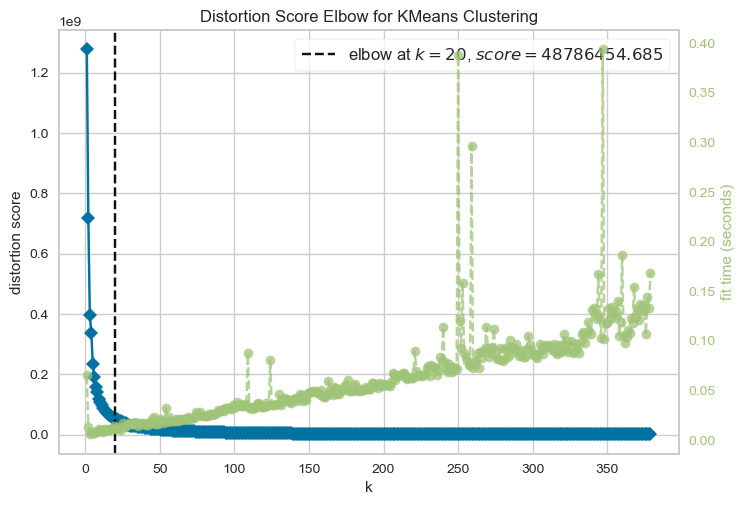

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=379, random_state=20), k=(1, 380))

In [251]:
#Elbow visuallizer
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=20), pca_alpha_homo, k=(1,380))


In [252]:
# Fit Kmeans alfgorithm
kmeans = KMeans(n_clusters = 20, random_state = 0, n_init='auto')
kmeans.fit(pca_alpha_homo)

KMeans(n_clusters=20, random_state=0)

In [253]:
kmeans.cluster_centers_

array([[ 834.19072351, 1388.20945908],
       [-320.98859838, -214.11319569],
       [ 703.23457381, -154.69066526],
       [-367.63333565,  552.26942294],
       [-650.56895865,  -35.61649482],
       [ 277.55725866, -155.23069438],
       [1369.72309027, -767.36107331],
       [ 333.19334935,  576.01778362],
       [-618.37802752, -339.70162289],
       [-313.12300551, 1200.01656934],
       [2330.25164369, -628.0603686 ],
       [1272.29594918, -240.31671507],
       [ 870.97096894, -585.95952322],
       [ 236.02491618, 1196.91670169],
       [  16.29026734, -307.5195756 ],
       [-401.47578042,   52.26613268],
       [  32.78956475,   90.25152968],
       [-908.90525076,  -59.09592268],
       [ 461.04413475, -446.66978094],
       [ 748.21035254,  434.66817412]])

In [254]:
kmeans.inertia_

49486786.98626043

In [259]:
pca_alpha_homo

(1913, 2)

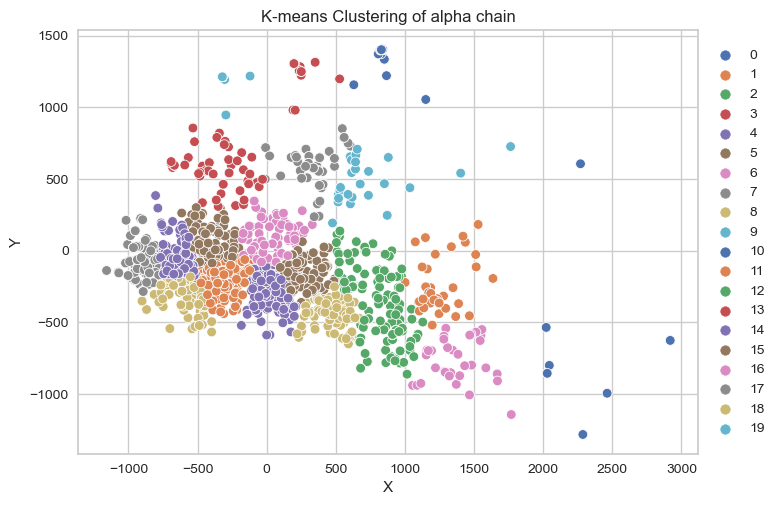

In [282]:
df = pd.DataFrame(pca_alpha_homo, columns=['X', 'Y'])

# Plot clusters using Seaborn
sns.scatterplot(data=df, x='X', y='Y', hue=kmeans.labels_, palette='deep')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('K-means Clustering of alpha chain')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

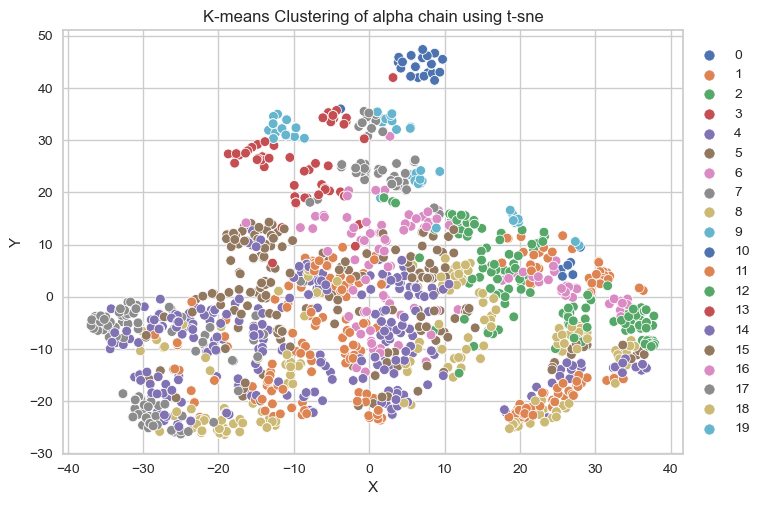

In [281]:
#t-sne cluster
# Plot clusters using Seaborn
sns.scatterplot(data=alpha_homo_dist_df, x='A', y='B', hue=kmeans.labels_, palette='deep', )
plt.title('K-means Clustering of alpha chain using t-sne')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Use T-sne reduction before cluster

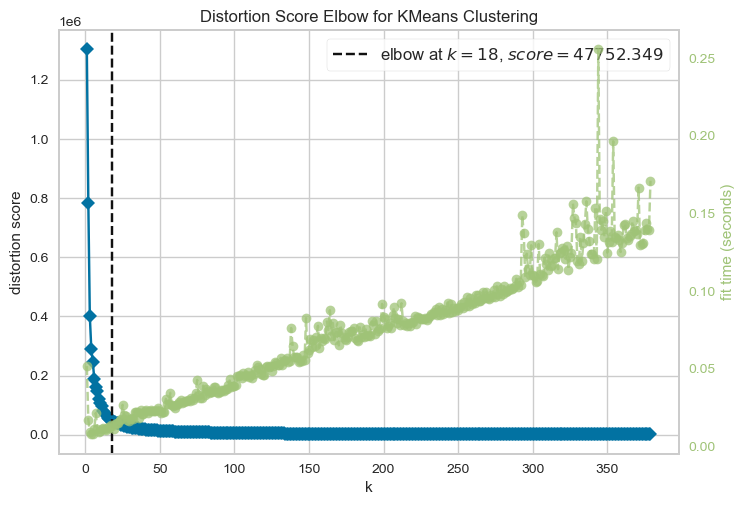

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=379, random_state=20), k=(1, 380))

In [283]:
#Elbow visuallizer
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=20), alpha_homo_dist_df, k=(1,380))

In [285]:
# Fit Kmeans alfgorithm
kmeans = KMeans(n_clusters = 18, random_state = 0, n_init='auto')
kmeans.fit(alpha_homo_dist_df)

KMeans(n_clusters=18, random_state=0)

In [287]:
kmeans.inertia_

48344.34765625

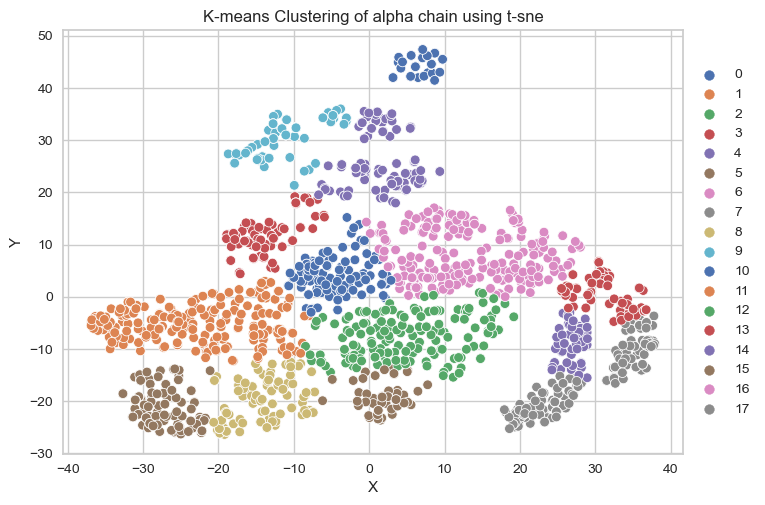

In [288]:
sns.scatterplot(data=alpha_homo_dist_df, x='A', y='B', hue=kmeans.labels_, palette='deep', )
plt.title('K-means Clustering of alpha chain using t-sne')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [302]:
fig_2d = px.scatter(
    alpha_homo_dist_df, x='A', y='B',
    color=kmeans.labels_, labels={'color': 'species'}
)
fig_2d.show()

In [295]:
from sklearn import metrics

#calinski harabasz
labels = kmeans.labels_
metrics.calinski_harabasz_score(alpha_homo_dist_df, labels)

2891.1808350366878

In [297]:
labels = kmeans.labels_
metrics.silhouette_score(alpha_homo_dist_df, labels, metric='euclidean')

0.44387096

Select cluster algorithm here
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation